In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('fraud_data.csv')

In [27]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [28]:
# Creating Dummy Classifier as baseline to compare against

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import train_test_split


# Classfying every instance to the most frequnt target class
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
 
y_dummy_predictions = dummy_majority.predict(X_test)

dummy_accuracy = accuracy_score(y_test, y_dummy_predictions)
dummy_recall = recall_score(y_test, y_dummy_predictions)

print(f"Dummy Classifier - Accuracy: {dummy_accuracy:.2f}, Recall: {dummy_recall:.2f}")

Dummy Classifier - Accuracy: 0.99, Recall: 0.00


In [29]:

from sklearn.metrics import precision_score
from sklearn.svm import SVC


    
df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    

svm_basic = SVC().fit(X_train, y_train)
svm_basic_predicted = svm_basic.predict(X_test)
    

svm_basic_accuracy = accuracy_score(y_test, svm_basic_predicted)
svm_basic_precision = precision_score(y_test, svm_basic_predicted)
svm_basic_recall = recall_score(y_test, svm_basic_predicted)
    
print(f"Basic SVM Classifier Accuracy: {svm_basic_accuracy:.2f}")
print(f"Basic SVM Classifier Precision: {svm_basic_precision:.2f}")
print(f"Basic SVM Classifier Recall: {svm_basic_recall:.2f}")

Basic SVM Classifier Accuracy: 0.99
Basic SVM Classifier Precision: 0.93
Basic SVM Classifier Recall: 0.35


In [30]:

svm_tuned = SVC(gamma=1e-07, C=1e9).fit(X_train, y_train)

    
# Get decision function output for each sample
decision_values = svm_tuned.decision_function(X_test)
    
# Apply decision threshold
#Model should become more sensitive, predicting more samples as the positive class. 
threshold = -220

svm_tuned_predicted = (decision_values > threshold).astype(int)


svm_tuned_accuracy = accuracy_score(y_test, svm_tuned_predicted)
svm_tuned_precision = precision_score(y_test, svm_tuned_predicted)
svm_tuned_recall = recall_score(y_test, svm_tuned_predicted)
    
print(f"Basic SVM Classifier Accuracy: {svm_tuned_accuracy:.2f}")
print(f"Basic SVM Classifier Precision: {svm_tuned_precision:.2f}")
print(f"Basic SVM Classifier Recall: {svm_tuned_recall:.2f}")

Basic SVM Classifier Accuracy: 0.99
Basic SVM Classifier Precision: 0.73
Basic SVM Classifier Recall: 0.82


In [31]:
# Training Logisitic Regression model on data

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve, auc
    
    
model_lr = LogisticRegression(solver='liblinear').fit(X_train,y_train)
    
y_scores_prob = model_lr.predict_proba(X_test)[:,1]

precision, recall, threshold = precision_recall_curve(y_test, y_scores_prob)
    
auc_score = auc(recall,precision)
    
fpr, tpr, threshold = roc_curve(y_test, y_scores_prob)


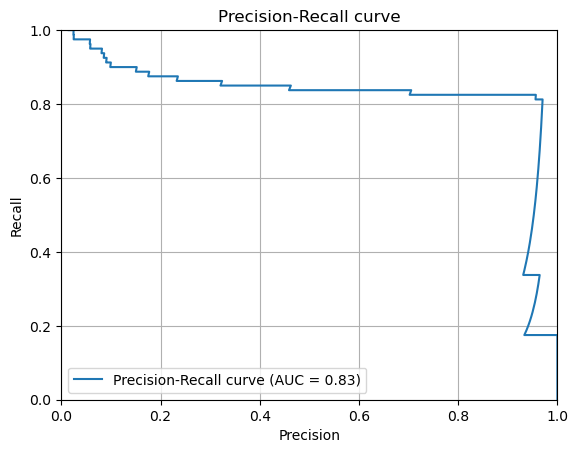

In [32]:
# Visualising Precision-Recall curve
plt.figure()
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(precision, recall, label=f"Precision-Recall curve (AUC = {auc_score:.2f})")
plt.ylabel("Recall")
plt.xlabel("Precision")
plt.grid(True)
plt.title("Precision-Recall curve")
plt.legend(loc="lower left")
plt.show()

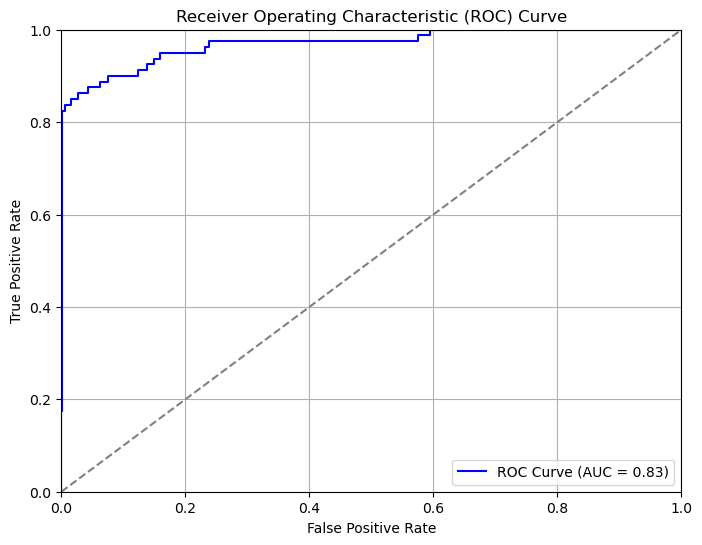

In [33]:
# Visualising ROC curve
plt.figure(figsize=(8, 6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()